# Project: TMDB-Movies Dataset Investigation

## Author: Jostin Flake

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset chosen for this analysis was the tmdb-movies dataset. Movies are an iconic and historic American-past time. Throughout this report, we will be exploring this dataset to answer some specific questions. The answers to these questions will provide us with a better understanding of the dataset. After the exploration of this data, we will use the findings to create a conclusion. Plots and graphs help to support the communication of the conclusion and are represented in the report visually. The questions answered throughout this analysis can be categorized into groups or sections. The list of questions, along with their associated categorization is as follows:
<ul>
    <lh><b>Questions about movies based on revenue and budget</b></lh>
    <li>What was the total amount of revenue earned?</li>
    <li>What was the average amount of revenue earned?</li>
    <li>What was the highest amount of revenue earned?</li>
    <li>What was the total amount spent on budgets?</li>
    <li>What was the average amount spent on budgets?</li>
    <li>What was the largest amount spent on budgets?</li>
    <li>What is the correlation between the revenue and budget?</li>
</ul>
<ul>
    <lh><b>Questions about movies grouped by year</b></lh>
    <li>In each year, what was the movie that earned the most amount of revenue?</li>
    <li>In each year, what was the movie with the largest budget?</li>
    <li>In each year, what was the average amount of revenue earned?</li>
    <li>In each year, what was the average budget for a movie?</li>
    <li>In each year, what was the average rating for the movies released?</li>
    <li>Which year released the most number of movies?</li>
</ul>

Also it is important to notice that our calculations are being performed on the revenue_adj to account for inflation. All calculations on revenue and budget will be performed on the revenue_adj and budget_adj. These values represent an amount in terms of United States Dollars(USD) in the year of 2010.   

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties of Dataset

In [3]:
# The first line of code loads the tmdb-movies.csv dataset into a dataframe called movies_df.
# The second line of code prints out the datatypes for each column in the dataframe for inspection.

movies_df = pd.read_csv('tmdb-movies.csv')

print movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In the preceding cell, we wrangled our dataset from a CSV into a data frame. Now we can efficiently run functions and operations on the dataset to answer our questions. Also, in the cell above, we print out the datatypes of each column in the data frame. If we feel that any of these data types will cause problems in our functions, now is the time we will want to change those datatypes before moving on. However, it doesn't look like we will need to fix any datatypes to answer the questions above; we will leave the datatypes alone. However, it may be wise to drop some columns from our dataframe that aren't useful to our questions and won't be used in any of our data analysis.

In [4]:
# This cell of code drops unnecessary columns that are irrelevant to answer the questions asked. 

movies_df = movies_df.drop(columns=['imdb_id', 'popularity', 'budget', 'revenue', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'vote_count'])

In [5]:
print movies_df.dtypes

id                  int64
original_title     object
cast               object
genres             object
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object


The preceding code cells first took our dataframe movies_df and dropped columns, making our data set smaller. These columns were irrelevant to our questions and would not be used as data for any of our equations in the rest of this notebook. The print code above displays the columns and their data types for our new movies_df. You can see we went from twenty-one columns down to nine. It is always a good idea to have as simple and clean data as possible to avoid errant data.

In [6]:
# This line of code prints the number of rows in the dataframe.

print 'Number of Rows:', len(movies_df)

Number of Rows: 10866


Finally, in the cell above we returned the number of rows in the data frame. We will want to compare the number of rows above to the number of unique movies, to make sure we don't have duplicated or errant data. These steps are essential to help us better understand our dataset. Fixing datatypes, investigating the data, finding problems in the data, and fixing errant data are all steps in the data wrangling process. 

In [7]:
# In this cell we define a funcion that will get data from a column in our dataframe and then return a series of that data.
# The function passes in two argurments through the df and column parameters.

def get_unique_data(df, column):
    new_pd_series = pd.Series(df[column].values)
    return new_pd_series

In [8]:
# In this cell we will use our get_unique_data function to create a pandas series of the id column in the movies_df table.

ser_movie_id = get_unique_data(movies_df, 'id')

In [9]:
# In this cell we will use convert our pandas series to a python set.
# Then we will print the number of rows in the new set set_of_movies_id

set_of_movies_id = set(ser_movie_id)

print len(set_of_movies_id)

10865


The code above defines a function that takes the id column from our data frame and creates a series from those values. Once created, we could then create a set from that series and then print out the number of rows in the set. A set does not store duplicate values as elements. Now we compare the number of rows printed from our set with the number of rows printed from our original data frame. As you can see from the row above, the number of returned is one row less than the quantity returned previously. From this data, we can assume that there is one row of duplicate data exists in the dataset. If we were to continue without fixing the errant data, our evaluations would be incorrect. The exploration and cleaning of data are vital steps in the data analysis process.

### Data Cleaning (Identify and remove the duplicate row from movies_df)

In [10]:
# In this cell we will use a built-in pandas funciton to locate the duplicated row in our movies_df


duplicate_row_in_df = movies_df[movies_df.duplicated(subset='id')]

print(duplicate_row_in_df)

         id original_title                                               cast  \
2090  42194         TEKKEN  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...   

                                           genres  vote_average  release_year  \
2090  Crime|Drama|Action|Thriller|Science Fiction           5.0          2010   

      budget_adj  revenue_adj  
2090  30000000.0     967000.0  


In [11]:
# The code in this cell takes the specific id found and verifies the rows are duplicated in our movies_df.

movies_df.loc[movies_df['id'] == 42194]

,id,original_title,cast,genres,vote_average,release_year,budget_adj,revenue_adj
2089,42194,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010,30000000.0,967000.0
2090,42194,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010,30000000.0,967000.0


From the results in the cell above we can see that entry with id 42194 is duplicated. Now we will go about removing one of the duplicated rows from our data frame. Luckily, pandas has a built-in function for this so we don't have to create a function to do this.

In [12]:
movies_df = movies_df.drop_duplicates(subset ='id')

After running the code above we have modified our original movies_df and replaced it with the same dataframe minus the duplicated row.

In [13]:
print len(movies_df)

10865


The code above prints the number of rows in our modified movies_df data frame. Now we verify that the duplicate no longer exists in our data frame. We do this by running the same exploration code we did in the previous section General Properties of Dataset to verify the number of unique values returned matches the number of rows returned. 

In [14]:
ser_movie_id = get_unique_data(movies_df, 'id')

In [15]:
set_of_movies_id = set(ser_movie_id)

print len(set_of_movies_id)

10865


The code above produced the same number of unique values for the id column. It looks like it worked and the duplicate row was removed.

In [17]:
movies_df.loc[movies_df['id'] == 42194]

,id,original_title,cast,genres,vote_average,release_year,budget_adj,revenue_adj
2089,42194,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010,30000000.0,967000.0


The preceding code and results return all the rows in our data frame that match the problematic id we found earlier. It is always good to confirm the data was fixed.  

<a id='eda'></a>
## Exploratory Data Analysis



### Questions about movies based on revenue

In [18]:
# This cell of code will use the decscribe function to return various statics for our revenue_adj column in the data frame.
# The results are rounded to the second decimal place.

movies_df['revenue_adj'].describe().round(2)

count    1.086500e+04
mean     5.136900e+07
std      1.446383e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.370173e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

After running the code in the cell above you can see that the results are displayed using scientific notation. This makes reading the data difficult. As part of the data analysis process you often may need to go back and forth between phases as your investigation may lead to new findings. This is very normal, and so to fix this we are going to apply a format change to our pandas options.

In [19]:
# This cell, when ran, will change the global behaviour for pandas formatting for the entire jupyter notebook.

pd.set_option('display.float_format', lambda x: '%.5f' % x)

The cell above will format the display of floating decimals. This will remove the scientific notation from our results. 

In [20]:
# This cell will extract the revenue_adj values from the movies_df dataframe and then perform a variety of different calulations
# on the values. It will then return the results rounded to the second decimal.

movies_df['revenue_adj'].describe().round(2)

count        10865.00000
mean      51369001.76000
std      144638333.13000
min              0.00000
25%              0.00000
50%              0.00000
75%       33701729.01000
max     2827123750.41000
Name: revenue_adj, dtype: float64

This is same code prior to our the fix and the results are much easier to read. From this one line of code we already have answers to two of our questions about movies based on revenue and budget.
<ul>
    <li><b>What was the average amount of revenue earned?</b> 51369001.76</li>
    <li><b>What was the highest amount of revenue earned?</b> 2827123750.4</li>
</ul>

In [21]:
# This cell will print the sum of all the values in the revenue_adj column rounded to the second decimal.

print 'sum:', movies_df['revenue_adj'].sum().round(2)

sum: 558124204110.0


The cell above answers the question about the total amount of revenue earned.

<ul>
    <li><b>What was the total amount of revenue earned?</b> 558124204110.0</li>
</ul>

In [22]:
# This cell will extract the budget_adj values from the movies_df dataframe and then perform a variety of different calulations
# on the values. It will then return the results rounded to the second decimal.

movies_df['budget_adj'].describe().round(2)

count       10865.00000
mean     17549894.04000
std      34307526.66000
min             0.00000
25%             0.00000
50%             0.00000
75%      20853251.08000
max     425000000.00000
Name: budget_adj, dtype: float64

Just like we calculated a variety of statistics for the revenue_adj column, we do it again here for the budget_adj column.
This answers the following questions.

<ul>
    <li><b>What was the average amount spent on budgets?</b> 17549894.04</li>
    <li><b>What was the largest amount spent on budgets?</b> 425000000.00</li>
</ul>

In [23]:
# This cell will print the sum of all the values in the budget_adj column rounded to the second decimal.

print 'sum:', movies_df['budget_adj'].sum().round(2)

sum: 190679598715.0


The cell above answers the following question, and prints the total amount spent on budgets.

<ul>
    <li><b>What was the total amount spent on budgets?</b> 190679598715.0</li>
</ul>

One of the most interesting questions we can ask about this dataset concerning the topic of movies is, whether or not budget spent affects revenue earned. What is the correlation between these two variables and is it a strong or weak correlation. We will explore this correlation next.

In [25]:
# This cell defines a generic function that will take in two variables as parameters and then return the correlation.

def correlation(x, y):

    x_standardized = (x - x.mean()) / x.std(ddof=0)
    y_standardized = (y - y.mean()) / y.std(ddof=0)
    
    product_xy_standardized = x_standardized * y_standardized
    pearsons_r = product_xy_standardized.mean()
    
    return pearsons_r

The cell above defines a function that will take in two variables as parameters and then return the correlation between the two parameters. Notice inside of the function we are returning a variable called pearsons_r. This is in reference to pearsons_r, the equation known to find the correlation between two variables. We can see the actual equation to find a correlation inside of our correlation function. First you subtract from the mean from each value in your variable and then you divide that by the standard deviation for that variable. We return that value to a new variable, in this case it is x_standardized. Next, repeat this process for the second variable, and return the results to y_standardized. Once we have two new variables, we will multiply those two variables together and then return the mean. The final output gives us our correlation or pearsons_r. 

In [26]:
# This cell utilizes the function correlation to return the correlation between revenue_adj and budget_adj.
# The output is stored to a variable called correlation_rb (revenue_adj and budget_adj) and printed on the next line.

correlation_rb = correlation(movies_df['revenue_adj'], movies_df['budget_adj'])
print "The correlation between revenue_adj and budget_adj is:", correlation_rb.round(2)

The correlation between revenue_adj and budget_adj is: 0.65


The cell above uses our defined correlation function to find the correlation between revenue_adj and budget_adj. Measuring values of correlation is based on a scale that ranges from 0 to 1. If the correlation between two variables returns a score of 1 it would mean that they are 100% correlated, at which point it would be safe to say they are caused by each other. This almost never happens in real life, remember correlation does not mean causation. The close pearsons_r or the correlation is to 1 the stronger the correlation. Anything over .8 is a strong correlation If the correlations scores closer to 0, that signifies that the two variables are not very correlated, we call this weak correlation. 

Since our score returned was 0.65 we can safely presume that there is a moderately positive correlation between revenue_adj earned and the budget_adj spent to make the movie.

In [27]:
data_rb = movies_df.groupby(['budget_adj', 'revenue_adj'], as_index = False).mean()

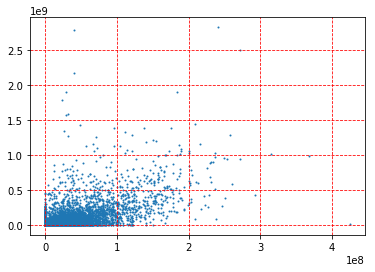

In [28]:
plt.scatter(data_rb['budget_adj'], data_rb['revenue_adj'], s = 1)
plt.grid(linestyle='--', color = 'red')

From the plot above we can see that the majority of the of the x and y coordinates are both negative, which means that the product of the x and y coordinates will be be positive. This defines a postive correlation because if the coordinates lie in the bottom-left or top-right of the scatter plot, the direction of the correlation will be positive. This helps confirm our previous finding that the correlation between revenue_adj earned and the budget_adj is moderately positive.

### Questions about movies grouped by year

In [29]:
# In this cell we define a function to take in a series and then sort that series values by largest to smallest. 
# Then return the largest value.

def largest_value(x):
    sorted_x = x.sort_values(inplace = False, ascending = False)
    return sorted_x.iloc[0]

In the preceding cell we define a function that will be useful for the remaining of our data analysis. It defines a function called largest_value that takes in a series as an argument and then returns the largest value from the series.

In [30]:
# This cell defines a funcion to get the max value for a grouped by dataframe. 
# It takes in two parameters. First the column name for the max value you wish to retrieve. 
# Second the column name for which you wish to group by.

def max_value_by_column(value_column_name, groupby_column_name):
    grouped_df = movies_df.groupby(groupby_column_name)[value_column_name].apply(largest_value)
    grouped_df.reset_index()
    new_grouped_df = grouped_df.to_frame()
    combined_df = new_grouped_df.merge(movies_df, on=value_column_name, how = 'left')
    return combined_df

The cell above does alot which will be explained here. The cell defines a function that will get the max value for a grouped by dataframe and return a new data frame object based on the the arguments passed through. The function takes two parameters, first the column name from the movies_df dataframe for the max value you wish to retrieve. Second the column name in the movies_df dataframe for which you wish to group by. There also is a lot happening within the function itself, a bullet point description to clarify this is provided here.
<ul>
    <li>The first line of code inside of the function performs the pandas groupby function by passing in the arguments and using .apply to apply our largest_value function during the groupby operation. This returns a  object that has contains the max value for the value_column_name which was passed into the function, we are storing to a new variable called group_df.</li>
    <li>The second line inside the function resets the index for the new object, which allows the column that was being used to groupby to become active as a column. As before running this line of code, the column that was being used to groupby was not a column, but was being used as the index for the object.</li>
    <li>The third line of code takes that new object and creates a new dataframe called new_grouped_df based on the columns and values.</li>
    <li>The fourth line of code merges the new_grouped_df dataframe with the original movies_df dataframe based on the value_column_name provided in the function. The line of code also sets 'left' for the how option inside of the .merge pandas function to ensure we are returning everything from the new_grouped_df, regardless if its found or not inside the original movies_df. We then store this combination of dataframes to a new dataframe variable called combined_df.</li>
    <li>The last line of code simply returns the combined dataframe combined_df.</li>
</ul>   
This function will save us a lot of time, as a lot of the questions investigated the remainder of the analysis will be based on grouped dataframes and finding the max value after grouping.

In [31]:
# This cell retuns the max value of revenue per year along with the movie title and year. 
# The column revenue_adj is renamed max_revenue_adj

movie_max_revenue_by_year = max_value_by_column('revenue_adj', 'release_year')
movie_max_revenue_by_year.rename(columns = {'revenue_adj':'max_revenue_adj'}, inplace = True)
movie_max_revenue_by_year[['release_year', 'original_title', 'max_revenue_adj']].round(2)

,release_year,original_title,max_revenue_adj
0,1960,Spartacus,442378047.43000
1,1961,One Hundred and One Dalmatians,1574814739.70000
2,1962,Lawrence of Arabia,504591421.51000
3,1963,From Russia With Love,561773358.99000
4,1964,Goldfinger,878080399.54000
5,1965,The Sound of Music,1129534861.99000
6,1966,Who's Afraid of Virginia Woolf?,226643572.37000
7,1967,The Jungle Book,1345551058.99000
8,1968,2001: A Space Odyssey,355546597.21000
9,1969,Butch Cassidy and the Sundance Kid,608151066.34000


The cell and output above uses the max_value_by_column function and retrieves the max amount of revenue earned in each year. This data is then assigned to a new variable called movie_max_revenue_by_year. Then to better portray the data being displayed we rename the revenue_adj column to the max_revenue_adj column. We then print out the name of the movie for each year that earned the most amount of revenue along with the amount earned. The following question is now answered.
<ul>
    <li><b>In each year, what was the movie that earned the most amount of revenue?</b><i> See output above</i></li>
</ul>

In [32]:
# This cell returns the max value of revenue grouped by year.
# Then the count is printed.

check_max_len = movies_df.groupby('release_year')['revenue_adj'].max()
print len(check_max_len)

56


The cell above was used to verify the number of rows returned to get our max movie by year list matched the number of rows returned for the simple function to find the max revenue for movies grouped by year. As you can see, the number of rows matches. It is always good to double check the work. 

In [33]:
# This cell retuns the max value of budget per year along with the movie title and year. 
# The column budget_adj is renamed max_budget_adj

movie_max_budget_by_year = max_value_by_column('budget_adj', 'release_year')
movie_max_budget_by_year.rename(columns = {'budget_adj':'max_budget_adj'}, inplace = True)
print len(movie_max_budget_by_year[['release_year', 'original_title', 'max_budget_adj']].round(2))

67


In [34]:
check_max_len = movies_df.groupby('release_year')['budget_adj'].max()
print len(check_max_len)

56


In the preceding two cells we follow the similar process we used to find the max revenue_adj per year to find the max_budget_adj per year. However in doing so it produced a list that contained sixty-seven rows, when we were expecting to find only fifty-six, to account for the fifty-six unique years in our movies_df dataframe. After inspection, the problem was that there were many years where the max budget_adj was equivalent for more than one movie in that same year. The largest_value and default .max() function shown above, both eliminate ties, returning just the first max value found. After investigating further, the issue lied with the .merge() operation being perfomed in the max_value_by_column function that simple joins our new combined_df with the original movie_df based on the value found. Even though the data was accurate and there are actually years that had multiple movies containing the same max_budget_adj, we will be dropping duplicates found in the max_budget_adj column from our movie_max_budget_by_year dataframe. 

In [35]:
movie_max_budget_by_year = movie_max_budget_by_year.drop_duplicates(subset='max_budget_adj')
movie_max_budget_by_year.reset_index()
movie_max_budget_by_year[['release_year', 'original_title', 'max_budget_adj']].round(2)

,release_year,original_title,max_budget_adj
0,1960,Spartacus,88475609.49000
1,1961,West Side Story,43769167.25000
4,1962,Lawrence of Arabia,108126733.18000
6,1963,Cleopatra,221544381.15000
7,1964,My Fair Lady,119514545.97000
8,1965,The Greatest Story Ever Told,138411273.88000
9,1966,The Bible: In the Beginning...,120924264.46000
10,1967,The Dirty Dozen,163419093.49000
11,1968,2001: A Space Odyssey,75227563.38000
12,1969,Battle of Britain,71331170.41000


In [36]:
print len(movie_max_budget_by_year[['release_year', 'original_title', 'max_budget_adj']].round(2))

56


In the cells preceding we drop duplicates so we can display just the first movie with the max_budget_adj for each year. Then we check the number of rows return to verify that we have all fifty-six years properly accounted for. 
<ul>
    <li><b>In each year, what was the movie with the largest budget?</b><i> See output above</i></li>
</ul>


In [37]:
# This cell creates a new grouped dataframe by release_year and then finds the average revenue_adj for each year. 
# The second line renames the revenue_adj for this new object to average_rev_adj

avg_revenue_earned_by_year = movies_df.groupby('release_year')['revenue_adj'].mean().round(2)
avg_revenue_earned_by_year.rename(columns = {'revenue_adj':'average_rev_adj'})
print avg_revenue_earned_by_year

release_year
1960    33409910.82000
1961    79471674.15000
1962    48562384.35000
1963    39245798.14000
1964    57076026.42000
1965    90576704.22000
1966    12375267.86000
1967   120576267.53000
1968    42553882.55000
1969    46778881.08000
1970    76741778.84000
1971    39645864.69000
1972    64495015.53000
1973   109293936.61000
1974    76452803.10000
1975    88172229.92000
1976    65302374.01000
1977   137636153.15000
1978    70442514.12000
1979    88808022.79000
1980    59999303.58000
1981    51900540.94000
1982    68582765.09000
1983    63148770.32000
1984    52686443.32000
1985    53483194.19000
1986    49369804.65000
1987    53152461.49000
1988    47553960.23000
1989    66314036.72000
1990    67200559.70000
1991    56659422.88000
1992    71019530.24000
1993    58980852.62000
1994    56729173.35000
1995    74870976.14000
1996    56641057.31000
1997    75388698.19000
1998    60471319.53000
1999    66362624.45000
2000    61243359.11000
2001    68241148.88000
2002    66736441.3700

In [38]:
print len(avg_revenue_earned_by_year)

56


The cells above group our movies_df by year and then returns the average revenue earned each year. Then the number of rows returned is checked to make sure each year is accounted for. 
<ul>
    <li><b>In each year, what was the average amount of revenue earned?</b><i> See output above.</i></li>
</ul>

In [39]:
# This cell creates a new grouped dataframe by release_year and then finds the vote_average or rating for each year. 
# The second line renames the vote_average for this new object to average_rating

avg_rating_of_movies_by_year = movies_df.groupby('release_year')['vote_average'].mean().round(2)
avg_rating_of_movies_by_year.rename(columns = {'vote_average':'average_rating'})
print avg_rating_of_movies_by_year

release_year
1960   6.32000
1961   6.37000
1962   6.34000
1963   6.33000
1964   6.21000
1965   6.19000
1966   6.13000
1967   6.24000
1968   6.38000
1969   5.96000
1970   6.42000
1971   6.42000
1972   6.53000
1973   6.70000
1974   6.40000
1975   6.39000
1976   6.34000
1977   6.15000
1978   6.13000
1979   6.31000
1980   6.16000
1981   6.17000
1982   6.24000
1983   5.97000
1984   6.00000
1985   6.18000
1986   6.00000
1987   6.13000
1988   5.97000
1989   6.07000
1990   5.99000
1991   6.01000
1992   6.08000
1993   6.05000
1994   5.94000
1995   6.06000
1996   5.90000
1997   5.99000
1998   5.97000
1999   6.03000
2000   5.88000
2001   5.90000
2002   5.97000
2003   5.93000
2004   5.99000
2005   5.87000
2006   5.94000
2007   5.96000
2008   5.93000
2009   5.86000
2010   5.99000
2011   5.96000
2012   5.80000
2013   5.88000
2014   5.92000
2015   5.89000
Name: vote_average, dtype: float64


In [40]:
print len(avg_rating_of_movies_by_year)

56


The cells above group our movies_df by year and then returns the average rating each year. Then the number of rows returned is checked to make sure each year is accounted for. 

<ul>
    <li><b>In each year, what was the average rating for the movies released?</b><i> See output above.</i></li>
</ul>


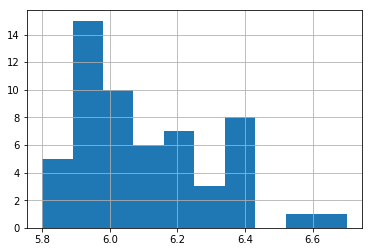

In [41]:
avg_rating_of_movies_by_year.hist()

This data is very intersting as it appears that the average ratings for movies do not deviate too far from one another each year. There isn't a year where movies on average were rated past seven, or a year on average where movies were rated below five. This is a histogram for the average rating for each year.

In [42]:
# In this cell we create a new grouped dataframe grouped by release_year count the number of orginal_titles in each group.
# The we sort the values from largest to smallest.

year_with_most_movies = movies_df.groupby('release_year')['original_title'].count()
print year_with_most_movies.sort_values(ascending= False).head(1)

release_year
2014    700
Name: original_title, dtype: int64


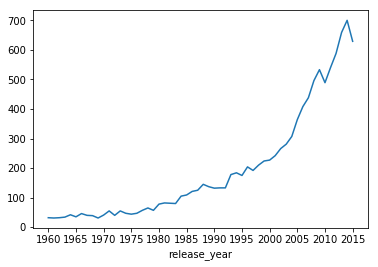

In [43]:
year_with_most_movies.plot(xticks = np.arange(1960, 2020, 5))

The preceding cell of code counts the number of movies in each group of year. Then it sorts the values from largest to smallest, then we restrict the output to just the first row. The next cell of code plots the grouped dataframe and sets the x axis values to range from 1960 to 2020, incrementing by 5 years each tick. 
<ul>
    <li><b>Which year released the most number of movies?</b> 2014</li>
</ul>

Also notice that there is a steady increase in the number of movies released as the years go on. 

<a id='conclusions'></a>
## Conclusions

The results of our data analysis have helped to answer the questions above, by providing some descriptive statistics regarding the revenue_adj and budget_adj information contained inside our movies dataset. A correlation between these two variables exists which denotes that the more money spent on a budget will moderatley and positively correlate to an increase in revenue when the movie is released. The correlation was determined to not be a very strong correlation as some outliers were the cause of a lower score for pearsons r. 
    Through this data analysis, we also discovered that the average number of movies released each year has steadily increased in the passage of time. In regards to the quality of those movies, we found that the ratings didnt' vary to much and that the general public for the past fifty plus years have rated their movies very similarly. 

### Resources used:

   (Feb, 05, 2020.) Pandas Documentation web site.
       Retreived from: https://pandas.pydata.org/pandas-docs/stable/index.html

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0